# Run the whole deltas algorithm

In [11]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [12]:
N1 = 1000
N2 = 10
m = 1
v = 1
model = 'SVM-rbf'
model = 'Linear'

data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[v, 0], [0, v]],
    cov2=[[v, 0], [0, v]],
    N1=N1,
    N2=N2,
    scale=False,
    test_nums=[1000, 1000],
    seed=0
)
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

In [13]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      _plot=False)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

In [14]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=1,
                                                     _print=False, 
                                                     _plot=False, 
                                                     max_trials=10000, 
                                                     method='supports-prop-update_mean',
                                                     parallel=True)

## Plot training data information

In [15]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
# deltas_model.plot_data()

## Show parameters

In [16]:
# deltas_model.print_params()

# Evaluation on test data

Baseline


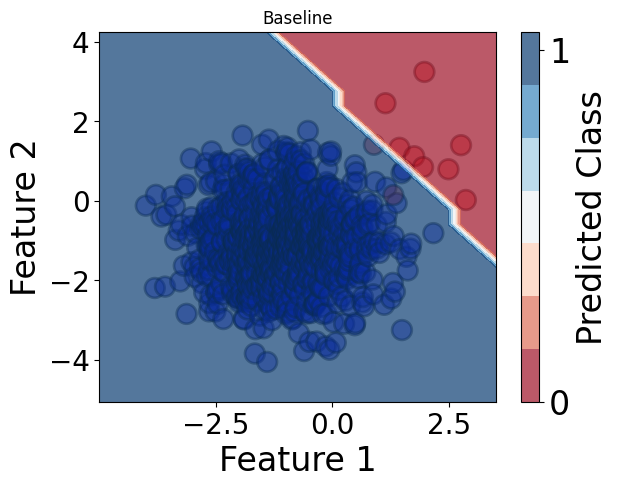

SMOTE


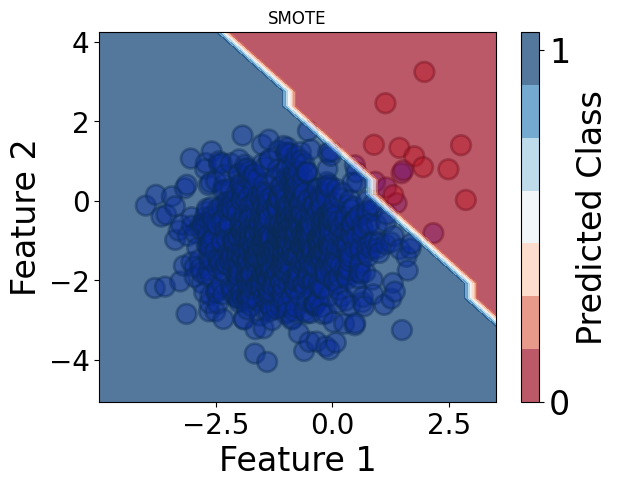

Balanced Weights


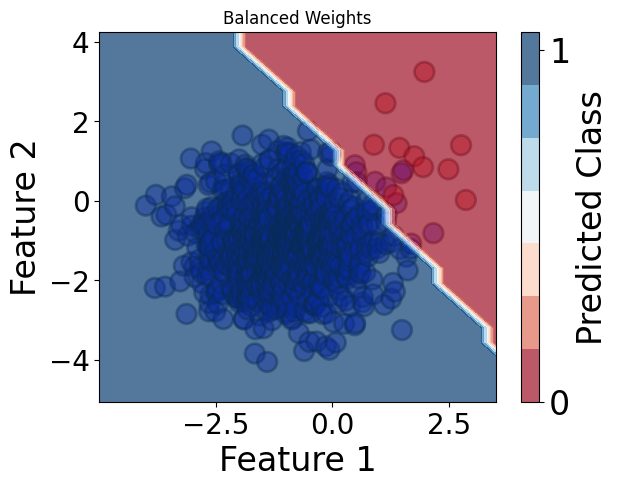

BMR


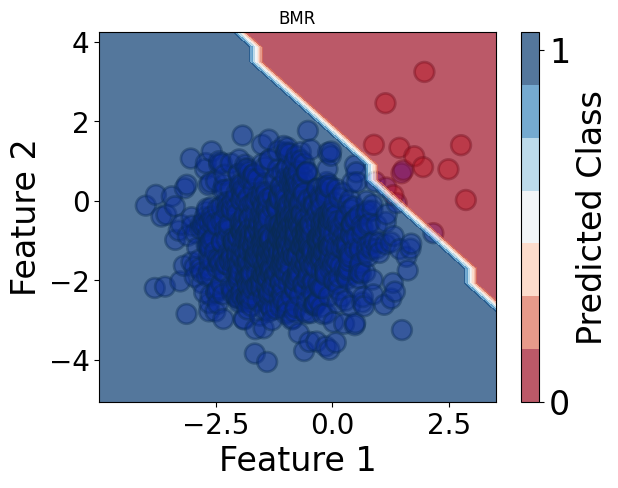

Threshold


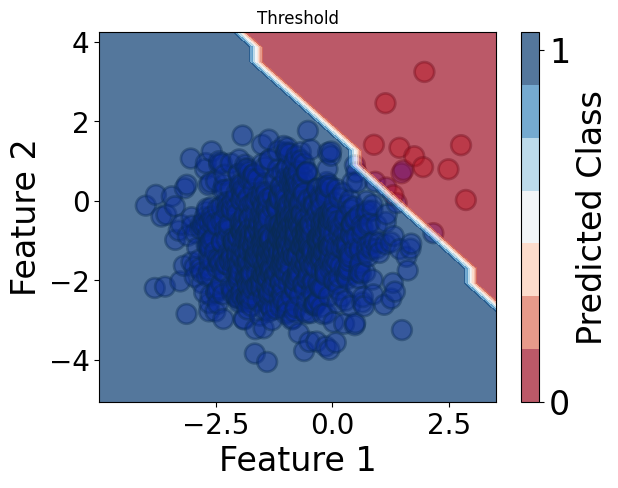

Our Method


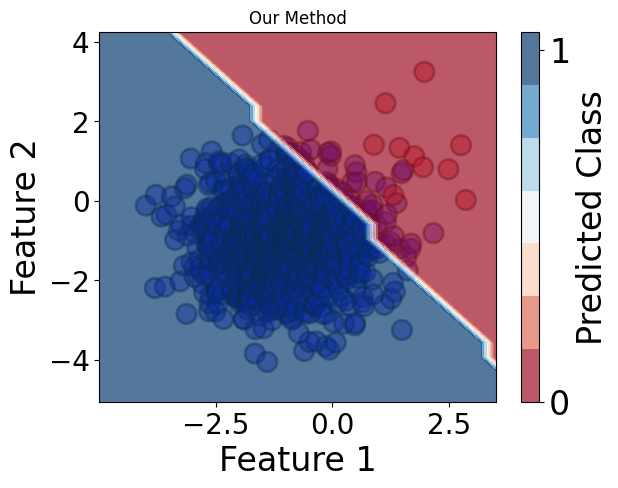

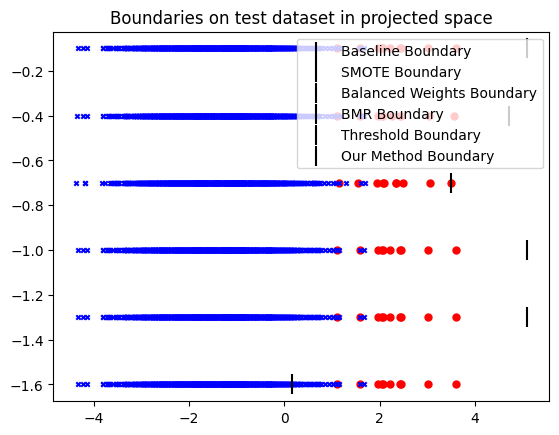

,Accuracy,G-Mean,F1
Method,,,
Baseline,0.998020,0.894427,0.888889
SMOTE,0.993069,0.996494,0.740741
Balanced Weights,0.990099,0.994987,0.666667
BMR,0.996040,0.997998,0.833333
Threshold,0.996040,0.997998,0.833333
Our Method,0.955446,0.977241,0.307692


In [19]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data'], _print=False,
              _plot=True, bayes_optimal=True)


In [18]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=False,
              _plot=True, dim_reducer=data_clf['dim_reducer'])

KeyError: 'dim_reducer'